In [32]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/content/drive/My Drive/Dataset/Hours_Scores.csv')

In [35]:
df.head()

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30


In [36]:
df.columns

Index(['Unnamed: 0', 'Hours', 'Scores'], dtype='object')

In [37]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [38]:
df.shape

(25, 2)

In [39]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
df.isnull().sum()

,0
Hours,0
Scores,0


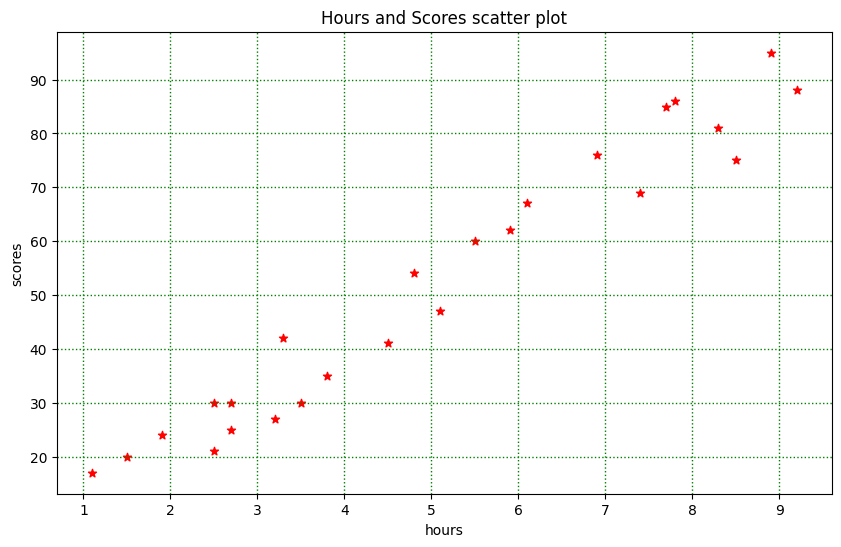

In [41]:

plt.figure(figsize=(10,6))
plt.scatter(df["Hours"],df["Scores"],marker="*",color="Red")
plt.xlabel("hours")
plt.ylabel("scores")
plt.title("Hours and Scores scatter plot")
plt.grid(color="green",linestyle=":",linewidth=1)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[["Hours"]],df[["Scores"]],test_size=0.2,random_state=42)

In [43]:
x_train.shape

(20, 1)

In [44]:
x_test.shape

(5, 1)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model=LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.coef_[0]

array([9.68207815])

In [49]:
model.intercept_

array([2.82689235])

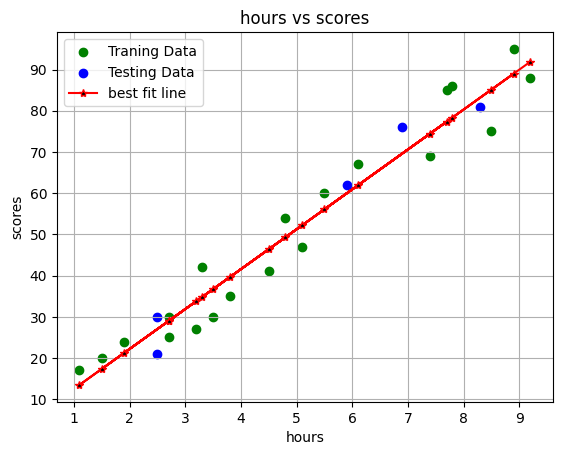

In [50]:
plt.scatter(x_train,y_train,color="green",label="Traning Data")
plt.scatter(x_test,y_test,color="blue",label="Testing Data")
plt.plot(x_train,model.predict(x_train),marker="*",markerfacecolor="black",color="Red",label="best fit line")
plt.title("hours vs scores")
plt.xlabel("hours")
plt.ylabel("scores")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error,r2_score

In [52]:
x_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9


In [53]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62


In [54]:
y_prad=model.predict(x_test)
y_prad

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [55]:
maerr=mean_absolute_error(y_test,y_prad)
maerr

3.9207511902099244

In [56]:
r_sqr=r2_score(y_test,y_prad)
r_sqr

0.9678055545167994

In [57]:
#model test
test=[[7],[8]]
model.predict(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.60143944],
       [80.28351759]])

In [58]:
import pickle as pkl

In [59]:
with open("hs.pkl","wb") as file:
    pkl.dump(model,file)

In [61]:

from google.colab import files
files.download('hs.pkl')  # Downloads to your local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>